In [1]:
#Step 1: Import Libraries
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import numpy as np

In [2]:
# Step 2: Load the CIFAR-10 Dataset
# CIFAR-10 contains 60,000 32x32 color images in 10 classes (e.g., airplane, car, bird, etc.)
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

In [3]:
# Step 3: Normalize Pixel Values
# Scale pixel values from [0, 255] to [0, 1] to improve training efficiency
train_images, test_images = train_images / 255.0, test_images / 255.0

In [4]:
# Step 4: Split Training Data into Training and Validation Sets
# Use 80% of the training data for training and 20% for validation
train_images, val_images, train_labels, val_labels = train_test_split(train_images, train_labels, test_size=0.2, random_state=42)

In [5]:
# Step 5: Print Dataset Sizes
# Verify the number of samples in each dataset
print(f"Training samples: {len(train_images)}")
print(f"Validation samples: {len(val_images)}")
print(f"Testing samples: {len(test_images)}")

Training samples: 40000
Validation samples: 10000
Testing samples: 10000


In [6]:
# Step 6: Define the CNN Model
# A Convolutional Neural Network (CNN) is defined using Keras Sequential API
model = models.Sequential([
    # First Convolutional Layer: 32 filters, each of size 3x3, with ReLU activation
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    # Max Pooling Layer: Reduces spatial dimensions by taking the maximum value in 2x2 patches
    layers.MaxPooling2D((2, 2)),
    # Second Convolutional Layer: 64 filters, each of size 3x3, with ReLU activation
    layers.Conv2D(64, (3, 3), activation='relu'),
    # Another Max Pooling Layer
    layers.MaxPooling2D((2, 2)),
    # Third Convolutional Layer: 64 filters, each of size 3x3, with ReLU activation
    layers.Conv2D(64, (3, 3), activation='relu'),
    # Flatten Layer: Converts 3D feature maps into 1D feature vectors
    layers.Flatten(),
    # Dense Layer: Fully connected layer with 64 units and ReLU activation
    layers.Dense(64, activation='relu'),
    # Output Layer: 10 units (one for each class in CIFAR-10)
    layers.Dense(10)
])

D:\jupiter\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [7]:
# Step 7: Compile the Model
# Configure the model for training
model.compile(optimizer='adam',  # Adam optimizer for gradient descent
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),  # Loss function for multi-class classification
              metrics=['accuracy'])  # Track accuracy during training

In [8]:
# Step 8: Train the Model
# Train the model for 30 epochs with a batch size of 64
# Use validation data to monitor performance during training
history = model.fit(train_images, train_labels, epochs=30, 
                    validation_data=(val_images, val_labels), batch_size=64)

Epoch 1/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 26s 32ms/step - accuracy: 0.3217 - loss: 1.8297 - val_accuracy: 0.5145 - val_loss: 1.3603
Epoch 2/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 20s 32ms/step - accuracy: 0.5322 - loss: 1.3093 - val_accuracy: 0.5530 - val_loss: 1.2613
Epoch 3/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 19s 31ms/step - accuracy: 0.5957 - loss: 1.1466 - val_accuracy: 0.6124 - val_loss: 1.1004
Epoch 4/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 18s 29ms/step - accuracy: 0.6391 - loss: 1.0275 - val_accuracy: 0.6476 - val_loss: 1.0174
Epoch 5/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 17s 27ms/step - accuracy: 0.6712 - loss: 0.9378 - val_accuracy: 0.6555 - val_loss: 0.9912
Epoch 6/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 17s 27ms/step - accuracy: 0.6996 - loss: 0.8668 - val_accuracy: 0.6661 - val_loss: 0.9630
Epoch 7/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 18s 30ms/step - accuracy: 0.7140 - loss: 0.8163 - val_accuracy: 0.6722 - val_loss: 0.9535
Epoch 8/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 25s 40ms/step - accuracy: 0.7360 - loss: 0.7617 - 

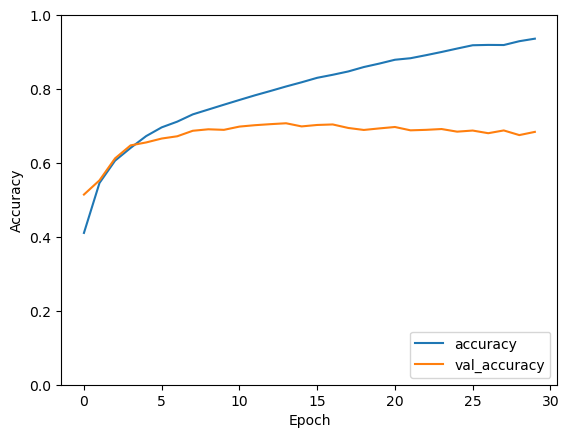

In [9]:
# Step 9: Plot Training and Validation Accuracy
# Visualize the model's accuracy over epochs
plt.plot(history.history['accuracy'], label='accuracy')  # Training accuracy
plt.plot(history.history['val_accuracy'], label='val_accuracy')  # Validation accuracy
plt.xlabel('Epoch')  # X-axis: Epoch number
plt.ylabel('Accuracy')  # Y-axis: Accuracy
plt.ylim([0, 1])  # Set y-axis limits between 0 and 1
plt.legend(loc='lower right')  # Add legend
plt.show()  # Display the plot

In [10]:
# Step 10: Install Required Libraries (if not already installed)
!pip install tensorflow matplotlib scikit-learn seaborn numpy

In [11]:
# Step 11: Evaluate the Model on the Test Set
# Test the model on unseen data to measure its performance
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(f"\nTest accuracy: {test_acc}")  # Print the test accuracy

313/313 - 2s - 8ms/step - accuracy: 0.6875 - loss: 1.6874

Test accuracy: 0.6875


In [12]:
# Step 12: Generate Predictions for the Test Set
# Use the trained model to predict labels for the test images
predictions = model.predict(test_images)
predicted_labels = np.argmax(predictions, axis=1)  # Convert logits to class labels

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step


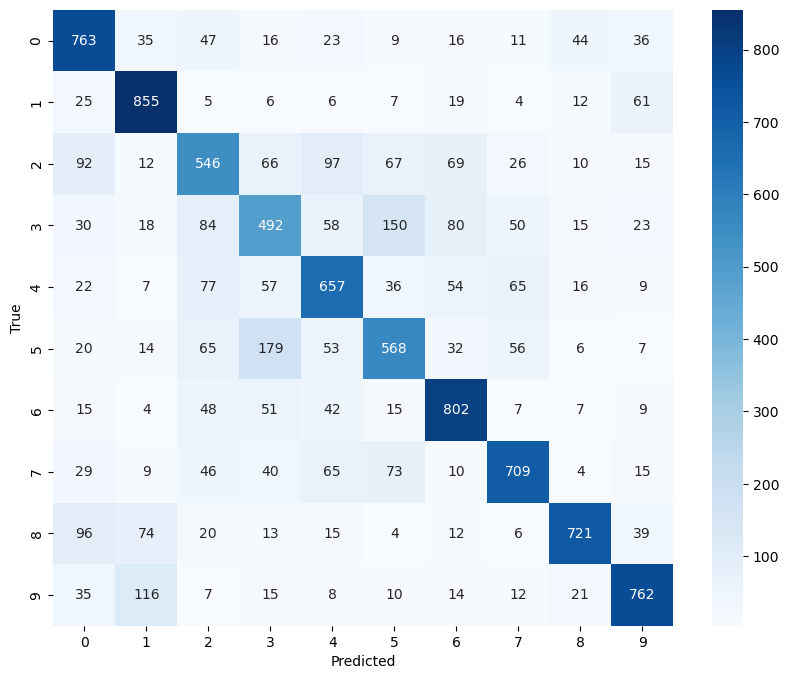

In [13]:
# Step 13: Plot the Confusion Matrix
# Visualize the model's performance for each class
cm = confusion_matrix(test_labels, predicted_labels)  # Compute confusion matrix
plt.figure(figsize=(10, 8))  # Set figure size
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')  # Create heatmap
plt.xlabel('Predicted')  # X-axis: Predicted labels
plt.ylabel('True')  # Y-axis: True labels
plt.show()  # Display the confusion matrix

In [14]:
# Step 14: Print the Classification Report
# Provide detailed metrics (precision, recall, F1-score) for each class
print(classification_report(test_labels, predicted_labels))

              precision    recall  f1-score   support

           0       0.68      0.76      0.72      1000
           1       0.75      0.85      0.80      1000
           2       0.58      0.55      0.56      1000
           3       0.53      0.49      0.51      1000
           4       0.64      0.66      0.65      1000
           5       0.60      0.57      0.59      1000
           6       0.72      0.80      0.76      1000
           7       0.75      0.71      0.73      1000
           8       0.84      0.72      0.78      1000
           9       0.78      0.76      0.77      1000

    accuracy                           0.69     10000
   macro avg       0.69      0.69      0.69     10000
weighted avg       0.69      0.69      0.69     10000



In [ ]:
# Import Libraries
import cv2  # For video capture and image processing
import pyautogui  # For controlling the mouse cursor
import mediapipe as mp  # For hand tracking
import math  # For calculating distances
from IPython.display import display, clear_output  # For displaying video in Jupyter Notebook
import ipywidgets as widgets  # For creating interactive widgets (e.g., stop button)
from PIL import Image  # For converting frames to images
import numpy as np  # For numerical operations

# Initialize Mediapipe Hand Tracking
mp_hands = mp.solutions.hands  # Mediapipe hands module
mp_draw = mp.solutions.drawing_utils  # Utilities for drawing landmarks
hands = mp_hands.Hands(min_detection_confidence=0.7, min_tracking_confidence=0.7)  # Initialize hand tracking

# Get Screen Size
screen_width, screen_height = pyautogui.size()  # Get the screen resolution

# Open Camera
camera = cv2.VideoCapture(0)  # Open the default camera (index 0)
camera.set(cv2.CAP_PROP_FRAME_WIDTH, 640)  # Set frame width to 640 pixels
camera.set(cv2.CAP_PROP_FRAME_HEIGHT, 480)  # Set frame height to 480 pixels

# Create an Output Widget for Displaying Video
output = widgets.Output()  # Create an output widget
display(output)  # Display the widget in Jupyter Notebook

# Create a Stop Button
stop_button = widgets.Button(description="Stop")  # Create a button labeled "Stop"
display(stop_button)  # Display the button

# Define Stop Flag and Button Click Function
stop_flag = False  # Flag to control the main loop

def on_stop_button_clicked(b):
    global stop_flag
    stop_flag = True  # Set stop_flag to True when the button is clicked

stop_button.on_click(on_stop_button_clicked)  # Attach the function to the button

try:
    while camera.isOpened() and not stop_flag:  # Loop until the camera is open or stop_flag is True
        ret, frame = camera.read()  # Capture a frame from the camera
        if not ret:
            continue  # Skip the iteration if the frame is not captured

        # Flip and Convert Frame to RGB
        frame = cv2.flip(frame, 1)  # Flip the frame horizontally (mirror effect)
        rgb_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)  # Convert the frame from BGR to RGB

        # Process Hands
        results = hands.process(rgb_frame)  # Detect and track hands in the frame

        if results.multi_hand_landmarks:  # Check if hands are detected
            for hand_landmarks in results.multi_hand_landmarks:  # Loop through each detected hand
                # Draw Landmarks and Connections
                mp_draw.draw_landmarks(frame, hand_landmarks, mp_hands.HAND_CONNECTIONS)  # Draw landmarks and connections

                # Extract Index Finger and Thumb Tip
                index_finger = hand_landmarks.landmark[8]  # Index finger tip (landmark 8)
                thumb_tip = hand_landmarks.landmark[4]  # Thumb tip (landmark 4)

                # Convert to Pixel Coordinates
                index_x, index_y = int(index_finger.x * frame.shape[1]), int(index_finger.y * frame.shape[0])  # Convert to pixel coordinates
                thumb_x, thumb_y = int(thumb_tip.x * frame.shape[1]), int(thumb_tip.y * frame.shape[0])  # Convert to pixel coordinates

                # Draw Circles on Fingertips
                cv2.circle(frame, (index_x, index_y), 10, (0, 255, 255), -1)  # Draw a circle on the index finger
                cv2.circle(frame, (thumb_x, thumb_y), 10, (0, 255, 255), -1)  # Draw a circle on the thumb tip

                # Map Hand Movement to Screen
                screen_x = int(index_finger.x * screen_width)  # Map x-coordinate to screen width
                screen_y = int(index_finger.y * screen_height)  # Map y-coordinate to screen height
                pyautogui.moveTo(screen_x, screen_y)  # Move the mouse cursor to the mapped coordinates

                # Click Detection (Euclidean Distance)
                distance = math.hypot(thumb_x - index_x, thumb_y - index_y)  # Calculate Euclidean distance
                if distance < 25:  # If the distance is below the threshold
                    pyautogui.click()  # Simulate a mouse click
                    print("Clicked!")  # Print a message to the console

        # Display the Frame
        frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)  # Convert the frame from BGR to RGB
        img = Image.fromarray(frame_rgb)  # Convert the frame to a PIL image
        with output:
            clear_output(wait=True)  # Clear the previous frame
            display(img)  # Display the current frame
finally:
    # Release Resources
    camera.release()  # Release the camera
    cv2.destroyAllWindows()  # Close all OpenCV windows

Output()

Button(description='Stop', style=ButtonStyle())

Clicked!
Clicked!
Clicked!
Clicked!
Clicked!
Clicked!
Clicked!
